In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
df=pd.read_csv('emnist-byclass-train.csv',header=None)

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697927,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697928,47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697929,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697930,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
def imgpro(img):
    imgg = img.reshape(28,28)
    imgg=cv2.flip(imgg,0)
    imgg = cv2.rotate(imgg, cv2.ROTATE_90_CLOCKWISE)
    return imgg

In [3]:
X=np.array(df.iloc[:,1:])
Y=np.array(df.iloc[:,0])

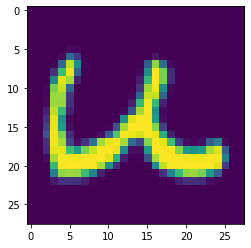

In [5]:
img = X[11]
img = img.reshape(28,28)
imgg=cv2.flip(img,0)
imgg = cv2.rotate(imgg, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(imgg)
# print(df.iloc[11,0])

NameError: name 'X_test' is not defined

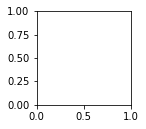

In [17]:
plt.figure(figsize=(20,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(X_test[i], cmap='gray')
    pred = predi[i].argmax()
    final=translate(pred)
    plt.title("predicted: {}".format(final))
    plt.axis('off')

plt.show()

In [16]:
im6

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 255, 255, 255,
        255, 255],
       [252, 253, 251, 251, 253, 251, 252, 254, 254, 253, 253, 251, 250,
        251, 251, 254, 255, 255, 255, 254, 253, 251, 249, 250, 252, 255,
        255, 255],
       [250, 252, 249, 249, 252, 249, 251, 254, 252, 251, 253, 251, 243,
        232, 209, 198, 202, 218, 224, 233, 246, 252, 252, 252, 252, 254,
        254, 254],
       [254, 253, 253, 253, 253, 252, 252, 254, 255, 254, 244, 187, 119,
         75,  39,  29,  33,  46,  55,  71, 108, 162, 198, 234, 252, 254,
        254, 254],
       [25

In [4]:
X=np.array(df.iloc[:,1:])
Y=np.array(df.iloc[:,0])

In [23]:
X.shape

(697932, 784)

In [24]:
Y.shape

(697932,)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)


In [532]:
X_train.shape,y_train.shape

((558345, 784), (558345,))

In [41]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [42]:
X_train[12,0:].shape

(28, 28, 1)

In [31]:
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

In [536]:
# X_train=X_train/255
# X_test=X_test/255

In [35]:
from tensorflow.keras.utils import to_categorical


In [36]:
y_train = to_categorical(y_train,num_classes=62, dtype='float32')
y_test = to_categorical(y_test,num_classes=62, dtype='float32')

In [37]:
X_train.shape,y_train.shape

((558345, 28, 28), (558345, 62))

In [38]:
X_test.shape,y_test.shape

((139587, 28, 28), (139587, 62))

In [129]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import keras
from tensorflow.keras import optimizers
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Activation

In [43]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(62,activation='sigmoid'))
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),metrics=['acc'])

In [11]:
model = Sequential()
model.add(Convolution2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Convolution2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(62, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), metrics=['accuracy'])

In [138]:
model = Sequential()

# conv 1
model.add(Convolution2D(filters=32, kernel_size=(3,3), padding='same', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))

# conv 2
model.add(Convolution2D(filters=64, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))

# conv 3
# emotion_model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
# emotion_model.add(BatchNormalization())
# emotion_model.add(Activation('relu'))
# emotion_model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))

# # conv 4
# emotion_model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same'))
# emotion_model.add(BatchNormalization())
# emotion_model.add(Activation('relu'))
# emotion_model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))

# flatten
model.add(Flatten())

# fully connected 1
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

# fully connected 2
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# fully connected 3
# emotion_model.add(Dense(128))
# emotion_model.add(BatchNormalization())
# emotion_model.add(Activation('relu'))
# emotion_model.add(Dropout(0.2))

# output block
model.add(Dense(62, activation='softmax'))

In [139]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [140]:
import visualkeras as vk 

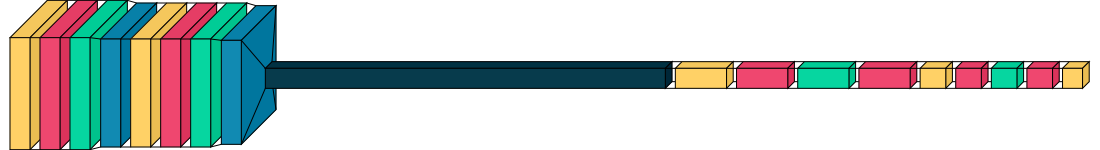

In [141]:
vk.layered_view(model)

In [142]:
training=model.fit(X_train,y_train,epochs=3,validation_data=(X_test,y_test),verbose=1)

Epoch 1/3
17449/17449 [==============================] - 2154s 123ms/step - loss: 0.5959 - accuracy: 0.8118 - val_loss: 0.3914 - val_accuracy: 0.8590
Epoch 2/3
17449/17449 [==============================] - 2113s 121ms/step - loss: 0.4291 - accuracy: 0.8484 - val_loss: 0.3665 - val_accuracy: 0.8652
Epoch 3/3
 1928/17449 [==>...........................] - ETA: 29:40 - loss: 0.3963 - accuracy: 0.8577

KeyboardInterrupt: 

In [15]:
from livelossplot import PlotLossesKeras

In [16]:
model.fit(X_train, y_train, epochs=1,
          validation_data=(X_test, y_test),
          callbacks=[PlotLossesKeras()],
          verbose=0)

KeyboardInterrupt: 

In [143]:
predi = model.predict(X_test)

In [ ]:
np.unique(predi)

In [26]:
import os

In [194]:
path=r'C:\Users\ACH\Desktop\P\th.jpg'
path2=
im=cv2.imread(path)
# cv2.imshow('image',im)

In [ ]:
plt.figure(figsize=(20,10))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(imgpro(X_test[i]))
    pred = predi[i].argmax()
    final=translate(pred)
    plt.title("predicted: {}".format(final))
    plt.axis('off')

plt.show()
   

In [200]:
# plt.imshow(im)
# pred = predi[].argmax()
# plt.title("predicted: {}".format(pred))
# plt.axis('off')

# plt.show()
im.shape
# im.ndim
# im
# hhh=im.reshape((28,28,1))

(28, 28, 3)

In [7]:
originalImage = cv2.imread('C:/Users/ACH/Desktop/P/img/16.png')
originalImage2 = cv2.imread('C:/Users/ACH/Desktop/P/img/2.png')
originalImage3 = cv2.imread('C:/Users/ACH/Desktop/P/img/3.png')
originalImage4 = cv2.imread('C:/Users/ACH/Desktop/P/img/4.png')
originalImage5 = cv2.imread('C:/Users/ACH/Desktop/P/img/5.png')
originalImage6 = cv2.imread('C:/Users/ACH/Desktop/P/img/6.png')
originalImage7 = cv2.imread('C:/Users/ACH/Desktop/P/img/7.png')
originalImage8 = cv2.imread('C:/Users/ACH/Desktop/P/img/8.png')
originalImage9 = cv2.imread('C:/Users/ACH/Desktop/P/img/9.png')
originalImage10 = cv2.imread('C:/Users/ACH/Desktop/P/img/10.png')
originalImage11 = cv2.imread('C:/Users/ACH/Desktop/P/img/11.png')
originalImage12 = cv2.imread('C:/Users/ACH/Desktop/P/img/12.png')
originalImage13 = cv2.imread('C:/Users/ACH/Desktop/P/img/13.png')
originalImage14 = cv2.imread('C:/Users/ACH/Desktop/P/img/14.png')
originalImage15 = cv2.imread('C:/Users/ACH/Desktop/P/img/15.png')

In [8]:
im = cv2.cvtColor(originalImage, cv2.COLOR_RGB2GRAY)
im2 = cv2.cvtColor(originalImage2, cv2.COLOR_BGR2GRAY)
im3 = cv2.cvtColor(originalImage3, cv2.COLOR_BGR2GRAY)
im4 = cv2.cvtColor(originalImage4, cv2.COLOR_BGR2GRAY)
im5 = cv2.cvtColor(originalImage5, cv2.COLOR_BGR2GRAY)
im6 = cv2.cvtColor(originalImage6, cv2.COLOR_BGR2GRAY)
im7 = cv2.cvtColor(originalImage7, cv2.COLOR_BGR2GRAY)
im8 = cv2.cvtColor(originalImage8, cv2.COLOR_BGR2GRAY)
im9 = cv2.cvtColor(originalImage9, cv2.COLOR_BGR2GRAY)
im10 = cv2.cvtColor(originalImage10, cv2.COLOR_BGR2GRAY)
im11 = cv2.cvtColor(originalImage11, cv2.COLOR_BGR2GRAY)
im12 = cv2.cvtColor(originalImage12, cv2.COLOR_BGR2GRAY)
im13 = cv2.cvtColor(originalImage13, cv2.COLOR_BGR2GRAY)
im14 = cv2.cvtColor(originalImage14, cv2.COLOR_BGR2GRAY)
im15 = cv2.cvtColor(originalImage15, cv2.COLOR_BGR2GRAY)

In [105]:
im = cv2.rotate(im, cv2.ROTATE_90_COUNTERCLOCKWISE)

In [11]:
im5=im.reshape((1,28,28))

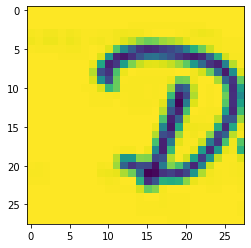

In [15]:
plt.imshow(im6)
plt.show()

In [28]:
im=np.array(im)

In [147]:
im = im.reshape(28,28,1)
im2 = im2.reshape(28,28,1)
im3 = im3.reshape(28,28,1)
im4 = im4.reshape(28,28,1)
im5 = im5.reshape(28,28,1)
im6 = im6.reshape(28,28,1)
im7 = im7.reshape(28,28,1)
im8 = im8.reshape(28,28,1)
im9 = im9.reshape(28,28,1)

In [148]:
imlist=[im,im2,im3,im4,im5,im6,im7,im8,im9,X_train[11,0:]]

In [149]:
imlist=np.array(imlist)

In [150]:
im.shape


(28, 28, 1)

In [52]:
X_train[11,0:].shape

(28, 28, 1)

In [55]:
len(imlist)

2

In [32]:
im.shape

(28, 28)

In [33]:
im=imgpro(im)
im2=imgpro(im2)

In [151]:
predict = model.predict(imlist)

In [35]:
predict

array([[6.04322493e-01, 5.80591857e-01, 2.70897746e-01, 2.30116844e-01,
        2.20463991e-01, 1.80523276e-01, 4.68912810e-01, 1.96499050e-01,
        2.27386415e-01, 2.06205696e-01, 6.63063884e-01, 2.88384140e-01,
        8.76464248e-02, 6.08423352e-01, 1.22633070e-01, 1.76897854e-01,
        5.04315495e-01, 5.17833710e-01, 2.43637532e-01, 1.57854438e-01,
        2.41493404e-01, 5.76996267e-01, 4.10407126e-01, 7.00798988e-01,
        4.44316208e-01, 7.68951774e-02, 7.54610777e-01, 1.47867620e-01,
        2.33462363e-01, 1.75323904e-01, 6.40366614e-01, 6.62264347e-01,
        6.12648487e-01, 2.73128927e-01, 1.42087191e-01, 5.15922010e-02,
        5.99727392e-01, 6.24151468e-01, 2.06242472e-01, 7.60338366e-01,
        7.09419847e-02, 1.06099248e-01, 1.37650013e-01, 7.88870454e-01,
        2.13185370e-01, 2.26106077e-01, 3.78261656e-01, 5.26753545e-01,
        2.24726588e-01, 7.49732614e-01, 1.32634521e-01, 3.60363513e-01,
        4.63512808e-01, 3.68507147e-01, 1.01030082e-01, 1.846523

In [94]:
pred = predict.argmax()

In [445]:
pred

11

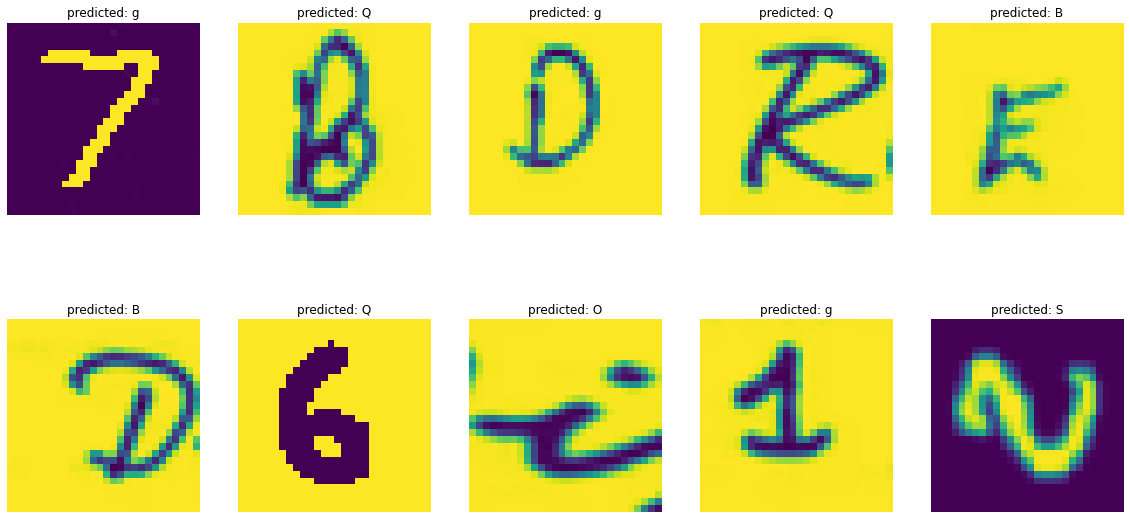

In [152]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(imlist[i])
    pred = predict[i].argmax()
    fin=translate(pred)
    plt.title("predicted: {}".format(fin))
    plt.axis('off')

plt.show()

In [505]:
keywords={
    "0":"0",
    "1":"1",
    "2":"2",
    "3":"3",
    "4":"4",
    "5":"5",
    "6":"6",
    "7":"7",
    "8":"8",
    "9":"9",
    "10":"A",
    "11":"B",
    "12":"C",
    "13":"D",
    "14":"E",
    "15":"F",
    "16":"G",
    "17":"H",
    "18":"I",
    "19":"J",
    "20":"K",
    "21":"L",
    "22":"M",
    "23":"N",
    "24":"O",
    "25":"P",
    "26":"Q",
    "27":"R",
    "28":"S",
    "29":"T",
    "30":"U",
    "31":"V",
    "32":"W",
    "33":"X",
    "34":"Y",
    "35":"Z",
    "36":"a",
    "37":"b",
    "38":"c",
    "39":"d",
    "40":"e",
    "41":"f",
    "42":"g",
    "43":"h",
    "44":"i",
    "45":"j",
    "46":"k",
    "47":"l",
    "48":"m",
    "49":"n",
    "50":"o",
    "51":"p",
    "52":"q",
    "53":"r",
    "54":"s",
    "55":"t",
    "56":"u",
    "57":"v",
    "58":"w",
    "59":"x",
    "60":"y",
    "61":"z",  
}

In [49]:
def translate(pred):
    keywords={
    0:"0",
    1:"1",
    2:"2",
    3:"3",
    4:"4",
    5:"5",
    6:"6",
    7:"7",
    8:"8",
    9:"9",
    10:"A",
    11:"B",
    12:"C",
    13:"D",
    14:"E",
    15:"F",
    16:"G",
    17:"H",
    18:"I",
    19:"J",
    20:"K",
    21:"L",
    22:"M",
    23:"N",
    24:"O",
    25:"P",
    26:"Q",
    27:"R",
    28:"S",
    29:"T",
    30:"U",
    31:"V",
    32:"W",
    33:"X",
    34:"Y",
    35:"Z",
    36:"a",
    37:"b",
    38:"c",
    39:"d",
    40:"e",
    41:"f",
    42:"g",
    43:"h",
    44:"i",
    45:"j",
    46:"k",
    47:"l",
    48:"m",
    49:"n",
    50:"o",
    51:"p",
    52:"q",
    53:"r",
    54:"s",
    55:"t",
    56:"u",
    57:"v",
    58:"w",
    59:"x",
    60:"y",
    61:"z",  
}
    return keywords[pred]

In [23]:
translate(1)

'1'